### Hierarchical Clustering

- an unsupervised ML technique, used to group the unlabeled datasets into a cluster
- also called additive hierarchical clustering.

Hierarchical clustering algorithms are devided into two categories as below:
    
    1.Agglomerative hierarchical Clustering
    2.Divisive hierarchical algorithms

#### 1.Agglomerative hierarchical Clustering

- Each data point is treated as a single cluster 
- then successively merged or agglomerated (bottom-up approach) into the pairs of clusters 
- The hierarchy of the clusters is represented as a dendrogram or tree structure

In [216]:
#### Steps in Agglomerative Hierarchical Clustering

1. Take each data point as a single cluster. Hence, Hence we will have 'n' number of clusters at the start
2. Now,join two closet datapoints and make a big cluster, the no of clusters is n-1 now
   - The points having the least distance are referred to as similar points and we can merge them.
3. Now, to make more big clusters we need to join two closet clusters. This will result in total of n-2 clusters.
4. Now, to form one big cluster repeat the above three steps until n would become 0 i.e. no more data points left to join
5. At last, after making one single big cluster, dendrograms will be used to divide into multiple clusters depending upon the problem.

In [217]:
# What is proximity matrix in Hierarchical Clustering

- its N x N matrix, which records distance between every pair of points in Hierarchical Clustering
- N here is the number of observation or points

In [222]:
# what is a Dendrogram???

The dendrogram is a tree-like structure that is mainly used to store each step of Hierachical Clustering as a memory

- In the dendrogram plot, the Y-axis shows the Euclidean distances between the data points, 
- and the x-axis shows all the data points of the given dataset.
- height of the join of two vertical lines, will be the distance between the points or clusters linked to them on x axis

#### 2.Divisive hierarchical algorithms

- all the data points are treated as one big cluster 
- and then we keep dividing (Top-down approach) the one big cluster into various small clusters.
- this algorithm does not require to preasume the number of clusters, instead it needs a split method

In [218]:
#### Steps in Divisive Hierarchical Clustering

- we start with a single cluster and assign all the points to that cluster
- Now, at each iteration, we split the farthest point in the cluster and repeat this process until each cluster only contains a single point

#### Measures for the distance between two clusters

There are various ways to calculate the distance between two clusters, and these ways decide the rule for clustering. These measures are called Linkage methods

In [3]:
# 1.Single Linkage:

It is the Shortest Distance between the closest points of two clusters

<img src='single-linkage.jpg'>

                                                image source:javatpoint.com

In [7]:
# 2.Complete Linkage:

distance between the farthest two points of two different clusters.
- it forms tighter clusters than single-linkage.

<img src='complete-linkage.jpg'>

                                                image source:javatpoint.com

In [8]:
# 3.Average Linkage

- It is the average distance between all combination of two points between two clusters. 
- It is also one of the most popular linkage methods.

In [9]:
# 4.Centroid Linkage:

<img src='centroid-linkage.jpg'>

                                            image source:javatpoint.com

### Implementation of Hierarchical Clustering

In [131]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns
from sklearn.decomposition import PCA

In [137]:
from sklearn.datasets import make_classification
X,y=make_classification(n_samples=300,n_features=4)

In [139]:
X=pd.DataFrame(X,columns=list('abcd'))
X['y']=y

In [140]:
X.head(2)

,a,b,c,d,y
0,-1.508195,2.036266,-0.000371,0.614891,1
1,1.653576,-0.361437,1.381771,0.032556,0


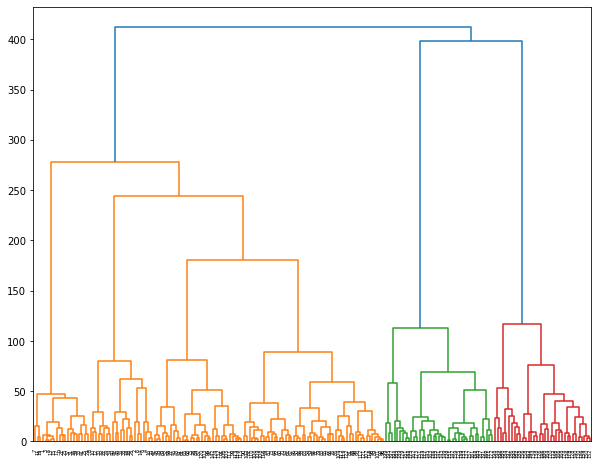

In [223]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize =(10, 8))
dendo = dendrogram((linkage(X, method ='ward')))

Now the optimum number of clusters is given by numbers of vertical lines in maximum vertial distance that do not cut any horizonal lines, here we get 2.

In [ ]:
# Making model with these 2 clusters

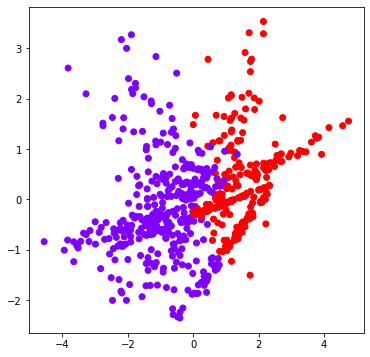

In [153]:
from sklearn.cluster import AgglomerativeClustering
agg2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X['a'], X['b'],c = agg2.fit_predict(X), cmap ='rainbow')
plt.scatter(X['c'], X['d'],c = agg2.fit_predict(X), cmap ='rainbow')
plt.show()

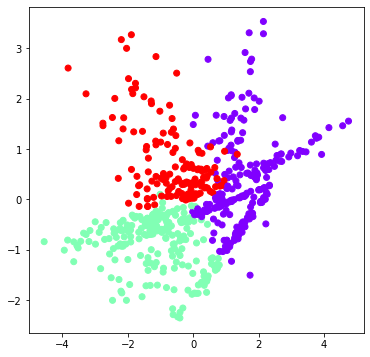

In [154]:
# Visualizing with 3 clusters

agg3 = AgglomerativeClustering(n_clusters = 3)

plt.figure(figsize =(6, 6))
plt.scatter(X['a'], X['b'],c = agg3.fit_predict(X), cmap ='rainbow')
plt.scatter(X['c'], X['d'],c = agg3.fit_predict(X), cmap ='rainbow')
plt.show()

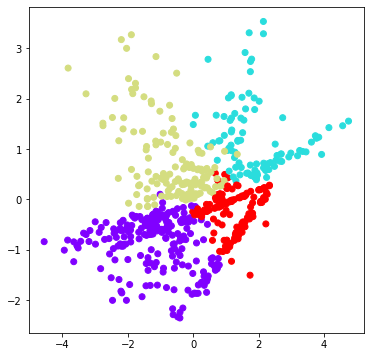

In [155]:
# Visualizing with 4 clusters

agg4 = AgglomerativeClustering(n_clusters = 4)

plt.figure(figsize =(6, 6))
plt.scatter(X['a'], X['b'],c = agg4.fit_predict(X), cmap ='rainbow')
plt.scatter(X['c'], X['d'],c = agg4.fit_predict(X), cmap ='rainbow')
plt.show()

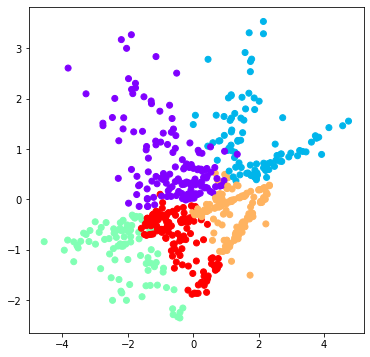

In [158]:
# Visualizing with 5 clusters

agg5 = AgglomerativeClustering(n_clusters = 5)

plt.figure(figsize =(6, 6))
plt.scatter(X['a'], X['b'],c = agg5.fit_predict(X), cmap ='rainbow')
plt.scatter(X['c'], X['d'],c = agg5.fit_predict(X), cmap ='rainbow')
plt.show()

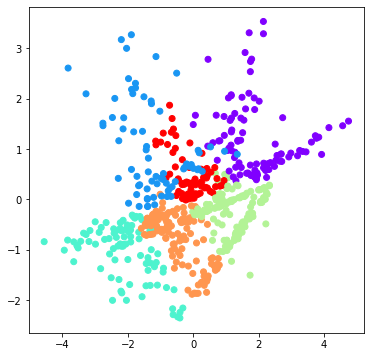

In [159]:
# Visualizing with 6 clusters

agg6 = AgglomerativeClustering(n_clusters = 6)

plt.figure(figsize =(6, 6))
plt.scatter(X['a'], X['b'],c = agg6.fit_predict(X), cmap ='rainbow')
plt.scatter(X['c'], X['d'],c = agg6.fit_predict(X), cmap ='rainbow')
plt.show()

In [156]:
# Attributes of agglomerative clustering models

# aggc.labels_
# aggc.n_clusters_
# aggc.n_features_in_
# aggc.n_leaves_

#### Silhouette Scores to find optimal clusters

In [157]:
from sklearn.metrics import silhouette_score

In [160]:
k = [2, 3, 4, 5, 6]
 
# Appending the silhouette scores of the different models to the list
sscore = []
sscore.append(silhouette_score(X, agg2.fit_predict(X)))
sscore.append(silhouette_score(X, agg3.fit_predict(X)))
sscore.append(silhouette_score(X, agg4.fit_predict(X)))
sscore.append(silhouette_score(X, agg3.fit_predict(X)))
sscore.append(silhouette_score(X, agg3.fit_predict(X)))

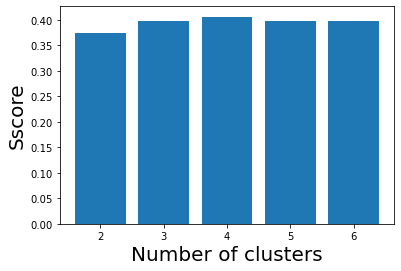

In [162]:
# Plotting a bar graph to compare the results
plt.bar(k, sscore)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('Sscore', fontsize = 20)
plt.show()

    So, optimum no of clusters is corresponding to highest silhoute score, hence 4

### Example 2:

In [195]:
# loading libraries
from scipy.cluster.hierarchy import dendrogram,linkage

In [196]:
# loading dataset
df=pd.read_csv('mall_customers.csv')
df.head(2)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81


In [197]:
df.columns=['CustomerID','Genre','Age','Annual Income','Spending Score']

In [198]:
df.shape

(200, 5)

In [199]:
df.isnull().sum()

CustomerID        0
Genre             0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

In [200]:
# finding duplicates in ID column
df['CustomerID'].duplicated().sum()

0

In [201]:
# Data preprocessing

In [202]:
df['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [203]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
ss=StandardScaler()
le=LabelEncoder()

df['Genre']=le.fit_transform(df['Genre'])

In [204]:
# Select training data, 

X=df.iloc[:,[2,3,4]]

In [205]:
# find optimum no of clusters

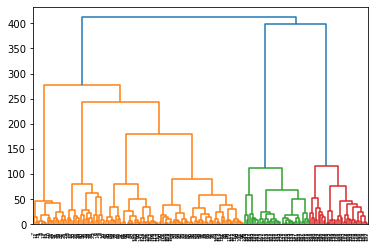

In [206]:
dendro=shc.dendrogram(shc.linkage(X,method='ward'))

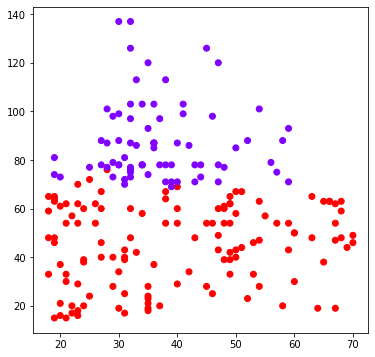

In [207]:
# model development, training and testing

from sklearn.cluster import AgglomerativeClustering
agg2 = AgglomerativeClustering(n_clusters = 2)
 
# Visualizing the clustering
plt.figure(figsize =(6, 6))
plt.scatter(X['Age'], X['Annual Income'],c = agg2.fit_predict(X), cmap ='rainbow')
# plt.scatter(X['Age'],X['Spending Score'],c = agg2.fit_predict(X), cmap ='rainbow')
plt.show()

In [212]:
model.n_clusters_

5

In [211]:
model.labels_

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 0, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

In [213]:
# visualising the results

    plt.scatter(X[y_pred==0,2],X[y_pred==0,3],s=100,c='blue',label='Cluster 1')
    plt.scatter(X[y_pred==1,2],X[y_pred==1,3],s=100,c='green',label='Cluster 2')
    plt.scatter(X[y_pred==2,2],X[y_pred==2,3],s=100,c='yellow',label='Cluster 3')
    plt.scatter(X[y_pred==3,2],X[y_pred==3,3],s=100,c='black',label='Cluster 4')
    plt.scatter(X[y_pred==4,2],X[y_pred==4,3],s=100,c='red',label='Cluster 5')

    plt.title('Clusters of Customers')
    plt.xlabel('Annual Income($)')
    plt.ylabel('Spending Score')
    plt.legend()
    plt.show()

### Parameters & Descriptions:


Sklearn official Docs:
        
        AgglomerativeClustering(
                                n_clusters=2,
                                affinity='euclidean',
                                memory=None,
                                connectivity=None,
                                compute_full_tree='auto',
                                linkage='ward',
                                distance_threshold=None,
                                compute_distances=False,
                                )

        Docstring:     
        Agglomerative Clustering:

        Recursively merges the pair of clusters that minimally increases
        a given linkage distance.

        Read more in the :ref:`User Guide <hierarchical_clustering>`.

        Parameters
        ----------
        n_clusters : int or None, default=2
            The number of clusters to find. It must be ``None`` if
            ``distance_threshold`` is not ``None``.

        affinity : str or callable, default='euclidean'
            Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
            "manhattan", "cosine", or "precomputed".
            If linkage is "ward", only "euclidean" is accepted.
            If "precomputed", a distance matrix (instead of a similarity matrix)
            is needed as input for the fit method.

        memory : str or object with the joblib.Memory interface, default=None
            Used to cache the output of the computation of the tree.
            By default, no caching is done. If a string is given, it is the
            path to the caching directory.

        connectivity : array-like or callable, default=None
            Connectivity matrix. Defines for each sample the neighboring
            samples following a given structure of the data.
            This can be a connectivity matrix itself or a callable that transforms
            the data into a connectivity matrix, such as derived from
            kneighbors_graph. Default is ``None``, i.e, the
            hierarchical clustering algorithm is unstructured.

        compute_full_tree : 'auto' or bool, default='auto'
            Stop early the construction of the tree at ``n_clusters``. This is
            useful to decrease computation time if the number of clusters is not
            small compared to the number of samples. This option is useful only
            when specifying a connectivity matrix. Note also that when varying the
            number of clusters and using caching, it may be advantageous to compute
            the full tree. It must be ``True`` if ``distance_threshold`` is not
            ``None``. By default `compute_full_tree` is "auto", which is equivalent
            to `True` when `distance_threshold` is not `None` or that `n_clusters`
            is inferior to the maximum between 100 or `0.02 * n_samples`.
            Otherwise, "auto" is equivalent to `False`.

        linkage : {'ward', 'complete', 'average', 'single'}, default='ward'
            Which linkage criterion to use. The linkage criterion determines which
            distance to use between sets of observation. The algorithm will merge
            the pairs of cluster that minimize this criterion.

            - 'ward' minimizes the variance of the clusters being merged.
            - 'average' uses the average of the distances of each observation of
              the two sets.
            - 'complete' or 'maximum' linkage uses the maximum distances between
              all observations of the two sets.
            - 'single' uses the minimum of the distances between all observations
              of the two sets.

            .. versionadded:: 0.20
                Added the 'single' option

        distance_threshold : float, default=None
            The linkage distance threshold above which, clusters will not be
            merged. If not ``None``, ``n_clusters`` must be ``None`` and
            ``compute_full_tree`` must be ``True``.

            .. versionadded:: 0.21

        compute_distances : bool, default=False
            Computes distances between clusters even if `distance_threshold` is not
            used. This can be used to make dendrogram visualization, but introduces
            a computational and memory overhead.

            .. versionadded:: 0.24

        Attributes
        ----------
        n_clusters_ : int
            The number of clusters found by the algorithm. If
            ``distance_threshold=None``, it will be equal to the given
            ``n_clusters``.

        labels_ : ndarray of shape (n_samples)
            cluster labels for each point

        n_leaves_ : int
            Number of leaves in the hierarchical tree.

        n_connected_components_ : int
            The estimated number of connected components in the graph.

            .. versionadded:: 0.21
                ``n_connected_components_`` was added to replace ``n_components_``.

        children_ : array-like of shape (n_samples-1, 2)
            The children of each non-leaf node. Values less than `n_samples`
            correspond to leaves of the tree which are the original samples.
            A node `i` greater than or equal to `n_samples` is a non-leaf
            node and has children `children_[i - n_samples]`. Alternatively
            at the i-th iteration, children[i][0] and children[i][1]
            are merged to form node `n_samples + i`

        distances_ : array-like of shape (n_nodes-1,)
            Distances between nodes in the corresponding place in `children_`.
            Only computed if `distance_threshold` is used or `compute_distances`
            is set to `True`.